# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pylab

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>EXPLORATORY DATA ANALYS</p>
</div>

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

In [7]:
# Black-sounding names
b_yes = np.sum(b.call)
b_n1 = len(b)
b_p = (b_yes / b_n1)


# White-sounding names
w_yes = np.sum(w.call)
w_n2 = len(w)
w_p = (w_yes / w_n2)


summary = {'Callback': np.array([b_yes, w_yes]).astype(int),
        'No Callback': np.array([b_n1 - b_yes, w_n2 - w_yes]).astype(int),
        'Total': np.array([b_n1, w_n2]).astype(int),
        '% Success': np.array(['{:.2%}'.format(b_yes/b_n1), '{:.2%}'.format(w_yes/w_n2)])}

tb2 = pd.DataFrame(summary, columns = ['Callback', 'No Callback', 'Total', '% Success'], 
                   index = ['Black-sounding names', 'White-sounding names'])
print(tb2)

total_yes = b_yes + w_yes
total_cases = b_n1 + w_n2

print('Total Callbacks: {}'.format(total_yes),
      'Total N: {}'.format(total_cases))

                      Callback  No Callback  Total % Success
Black-sounding names       157         2278   2435     6.45%
White-sounding names       235         2200   2435     9.65%
Total Callbacks: 392.0 Total N: 4870


In [8]:
# ECDF Function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

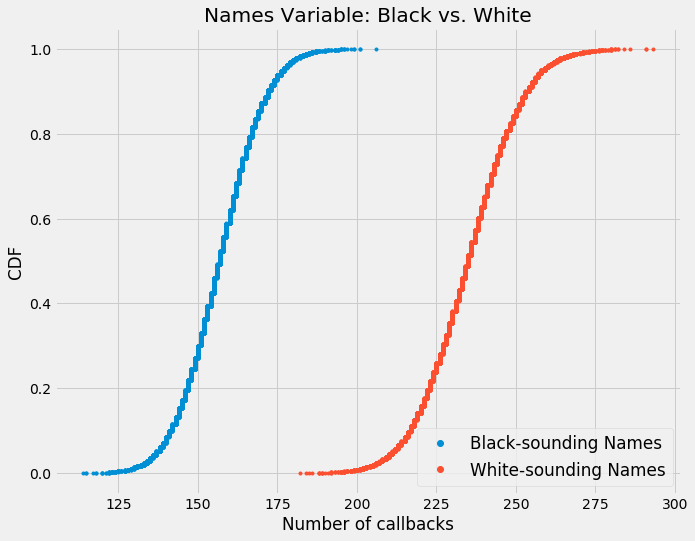

In [9]:

_ = plt.style.use('fivethirtyeight')
_ = plt.rcParams["figure.figsize"] = (10, 8)

#Plot CDFs of callbacks for black- vs. white-sounding names
b_samples = np.random.binomial(b_n1, b_p, size=10000)
w_samples = np.random.binomial(w_n2, w_p, size=10000)

bx, by = ecdf(b_samples)
_ = plt.plot(bx, by, marker='.', linestyle='none')

wx, wy = ecdf(w_samples)
_ = plt.plot(wx, wy, marker='.', linestyle='none')

plt.margins = 0.02
_ = plt.xlabel('Number of callbacks')
_ = plt.ylabel('CDF')
_ = plt.title('Names Variable: Black vs. White')
_ = plt.legend(('Black-sounding Names', 'White-sounding Names'), loc='lower right', fontsize='large', markerscale=2)

<div class="span5 alert alert-success">
<p>Q1: Appropriate Test? Does CLT apply? and Q2 State your Hypothesis</p>
</div>

Q1.The CLT applies for the Gender and Call variables because the key requirements of having randon, indepedent variables that tend towards a Normal distribution are met as it can be observed in the CDF graph shown above. 

For this particular situation, the suggested test to use is the Z-test for proportions since each sample observation can result in either a success or a failure, the sample includes at least 10 successes and 10 failures. 


In [10]:
r1 = w_n2 * w_p >= 10
r2 = b_n1 * b_p >= 10
r3 = w_n2 * (1-w_p) >= 10
r4 = b_n1 * (1-b_p) >= 10

print(r1,r2,r3,r4)

True True True True


Q2. My hypothesis will be Ho: p1 = p2 and Ha: p1 - p2 ≠ 0 with alpha=.5

In [11]:
# Frequentist Approach --> Z test for proportions with Zvalue of 1.96

p_total = (b_yes+ w_yes)/(w_n2 + b_n1)

q= 1-p_total


total_pn = np.sqrt((2*p_total*q)*(1/2435)) # Formula states (1/n1) + (1/n2)  

z_value = (b_p - w_p)*(1/total_pn)

print('Z_value:{}'.format(z_value))



Z_value:-4.108412152434346


In [13]:
#95% confidence interval for N

z_alpha = 1.96
ci_high = p_total + z_alpha*(np.sqrt((p_total*q)*(1/total_cases)))
ci_low = p_total - z_alpha*(np.sqrt((p_total*q* 1/total_cases)))

#95% confidence interval for Black-sounded names

q_b = 1-b_p
ci_high_b = b_p + z_alpha*(np.sqrt((b_p*q_b)/b_n1))
ci_low_b = b_p - z_alpha*(np.sqrt((b_p*(q_b))/b_n1))

#95% confidence interval for White-sounded names

q_w = 1-w_p
ci_high_w = w_p + z_alpha*(np.sqrt((w_p * q_w)/w_n2))
ci_low_w = w_p - z_alpha*(np.sqrt((w_p * q_w)/w_n2))

print('95% conf int for N: \t {} to {}'.format(ci_low, ci_high))
print('95% conf int for only Black: \t {} to {}'.format(ci_low_b, ci_high_b))
print('95% conf int for only White: \t {} to {}'.format(ci_low_w, ci_high_w))


95% conf int for N: 	 0.07285185698623672 to 0.08813376929713082
95% conf int for only Black: 	 0.05472122800904957 to 0.0742315440648724
95% conf int for only White: 	 0.08478045877727557 to 0.10823802171553758


In [14]:
moe_N = z_alpha*(np.sqrt((p_total*q)*(1/total_cases)))
moe_b = z_alpha*(np.sqrt((b_p*q_b)/b_n1))
moe_w = z_alpha*(np.sqrt((w_p*q_w)/w_n2))


print('Margin of err(black + white): \t {}'.format(moe_N *100))
print('Margin of err(black): \t {}'.format(moe_b * 100))
print('Margin of err (white): \t {}'.format(moe_w *100))

Margin of err(black + white): 	 0.7640956155447047
Margin of err(black): 	 0.9755158027911415
Margin of err (white): 	 1.1728781469131009


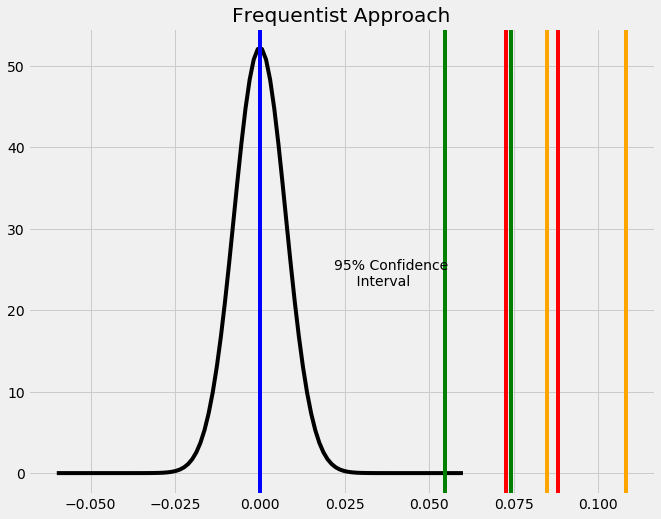

In [15]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 8)

# Graph the Frequentist results
x = np.linspace(- 0.06, 0.06, 100, endpoint=True)
pdf = [stats.norm.pdf(_, loc=0, scale=moe_N) for _ in x]
plt.plot(x, pdf, 'k-')
plt.figsize = (10, 8)

_ = plt.axvline(ci_high, color='red')
_ = plt.axvline(ci_low, color='red')
_ = plt.axvline(ci_high_b, color ='green')
_ = plt.axvline(ci_low_b, color ='green')
_ = plt.axvline(ci_high_w, color ='orange')
_ = plt.axvline(ci_low_w, color ='orange')
_ = plt.axvline(0, color='blue')
_ = plt.text(0.022, 23, '95% Confidence \n     Interval')
_ = plt.title('Frequentist Approach');

In [16]:
#Bootstrap
# Construct arrays of data: white-sounding names, black-sounding names
all_callb = np.array([True] * int(b_yes) + [False] * int(w_yes))
prop_diff = b_p - w_p

size = 10000

bs_reps_diff = np.empty(size)

for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(all_callb, size=w_n2))
    b_bs_replicates = np.sum(np.random.choice(all_callb, size=b_n1))
    
    bs_reps_diff[i] = (b_bs_replicates - w_bs_replicates)/total_cases
    
bs_p_value = np.sum(bs_reps_diff >= prop_diff) / len(bs_reps_diff)

bs_ci = np.percentile(bs_reps_diff, [2.5, 97.5])
bs_mean_diff = np.mean(bs_reps_diff)


print('obs diff: {}\n'.format(prop_diff))
print('BOOTSTRAP RESULTS\np-value: {}\n95% conf. int.: {}'.format(bs_p_value, bs_ci))

obs diff: -0.032032854209445585

BOOTSTRAP RESULTS
p-value: 1.0
95% conf. int.: [-0.0137577   0.01396304]


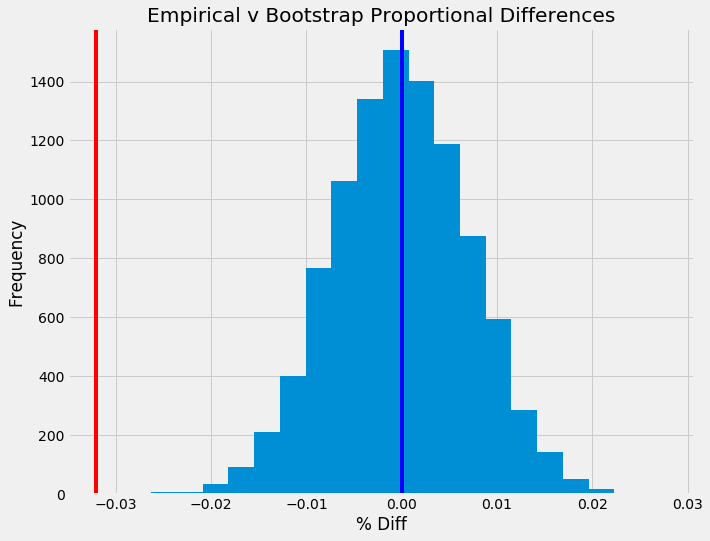

In [17]:
_ = plt.hist(bs_reps_diff, bins=20)
_ = plt.axvline(prop_diff, color='red')
_ = plt.axvline(np.max(bs_mean_diff), color='blue')
_ = plt.xlabel('% Diff')
_ = plt.ylabel('Frequency')
_ = plt.title('Empirical v Bootstrap Proportional Differences')
plt.show()

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

From my analysis, I concluded that my null hypothesis must be rejected with a 95% confidence level in favor of my alternative hypothesis. It proves that there is a preference from employers to callback resumes with white-sounding names than black-sounding names. The calculated margins of the errors add extra credibility to this analysis since they are within 1%. Even after doing a bootstrap replications for 10,000 samples, shows that the differences of the  empirical sample proportions and bootstraped sample proportions are within range. Thus, the empirical sample proportions could be used as good estimators of the actual population proportion.

At this point, given that the researchers took the necessary steps to make this a RSS, will be interesting to see if other variables (education/experience) could play a role in not rejecting our null hypothesis.
